# **CLUSTERING ANALYSIS**

# Data Preprocessing

In [8]:
# import hierarchical clustering libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from scipy import stats

In [9]:
# Load the dataset
df = pd.read_excel('EastWestAirlines.xlsx', sheet_name='data')
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [10]:
# Display the first few rows of the dataset
print(df.head())

   ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0    1    28143           0          1          1          1          174   
1    2    19244           0          1          1          1          215   
2    3    41354           0          1          1          1         4123   
3    4    14776           0          1          1          1          500   
4    5    97752           0          4          1          1        43300   

   Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  Award?  
0            1                  0                0               7000       0  
1            2                  0                0               6968       0  
2            4                  0                0               7034       0  
3            1                  0                0               6952       0  
4           26               2077                4               6935       1  


In [11]:
# Handling missing values
imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

In [12]:
# Removing outliers using Z-score
z_scores = np.abs(stats.zscore(df_imputed))
df_no_outliers = df_imputed[(z_scores < 3).all(axis=1)]

In [13]:
# Scaling features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_no_outliers)

In [14]:
# Convert back to DataFrame for ease of use
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)

In [41]:
df_scaled

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,-1.766325,-0.523260,-0.158869,-0.755664,0.0,0.0,-0.779029,-1.147142,-0.401822,-0.431775,1.431438,-0.718093
1,-1.765460,-0.667084,-0.158869,-0.755664,0.0,0.0,-0.776768,-1.025933,-0.401822,-0.431775,1.415848,-0.718093
2,-1.764596,-0.309747,-0.158869,-0.755664,0.0,0.0,-0.561235,-0.783516,-0.401822,-0.431775,1.448002,-0.718093
3,-1.763731,-0.739295,-0.158869,-0.755664,0.0,0.0,-0.761050,-1.147142,-0.401822,-0.431775,1.408053,-0.718093
4,-1.762866,0.601746,-0.158869,1.517591,0.0,0.0,1.599448,1.883076,2.859455,1.768005,1.399771,1.392577
...,...,...,...,...,...,...,...,...,...,...,...,...
3625,1.707275,-0.679496,-0.158869,-0.755664,0.0,0.0,-0.318457,-0.783516,-0.087785,0.118170,-1.295323,1.392577
3626,1.708139,0.062475,-0.158869,-0.755664,0.0,0.0,-0.734522,-0.662307,-0.401822,-0.431775,-1.299221,1.392577
3627,1.709004,0.211358,-0.158869,0.759839,0.0,0.0,0.614823,-0.298681,-0.401822,-0.431775,-1.295810,1.392577
3628,1.709869,-0.090836,-0.158869,-0.755664,0.0,0.0,-0.761050,-1.147142,0.383271,0.118170,-1.296298,-0.718093


# Exploratory Data Analysis (EDA)

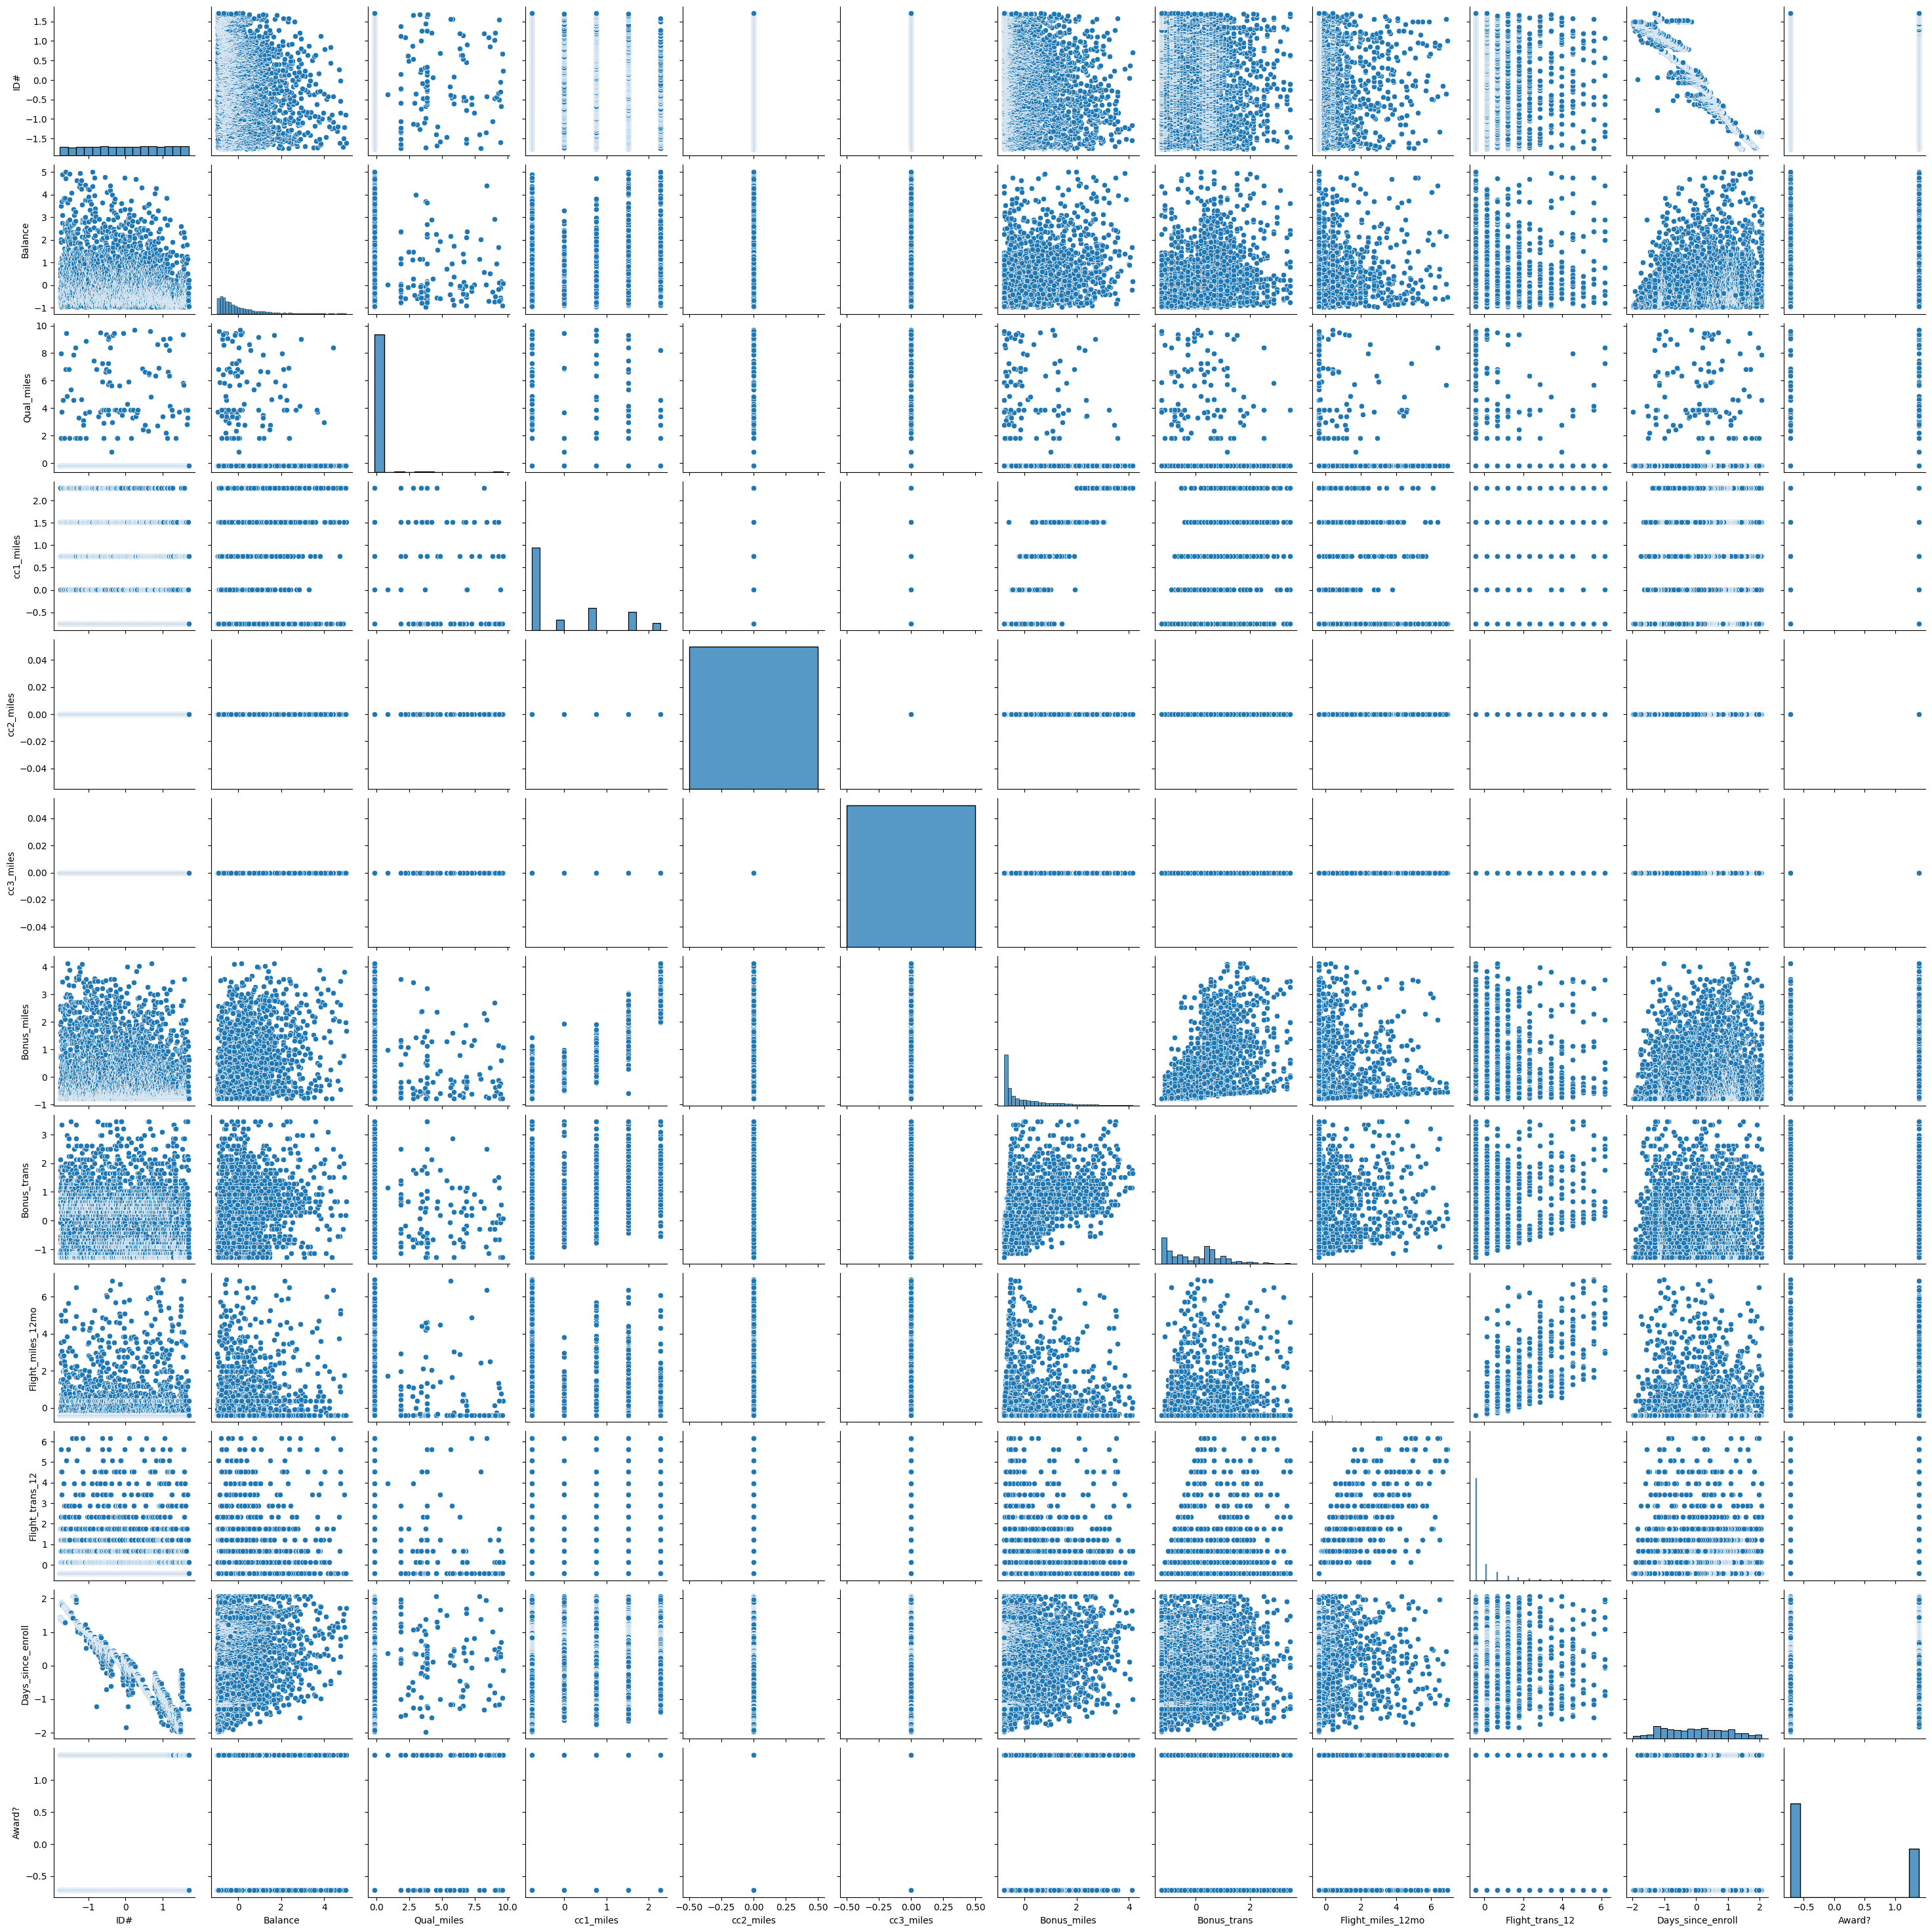

In [15]:
# Pair plot to visualize relationships
sns.pairplot(df_scaled)
plt.show()

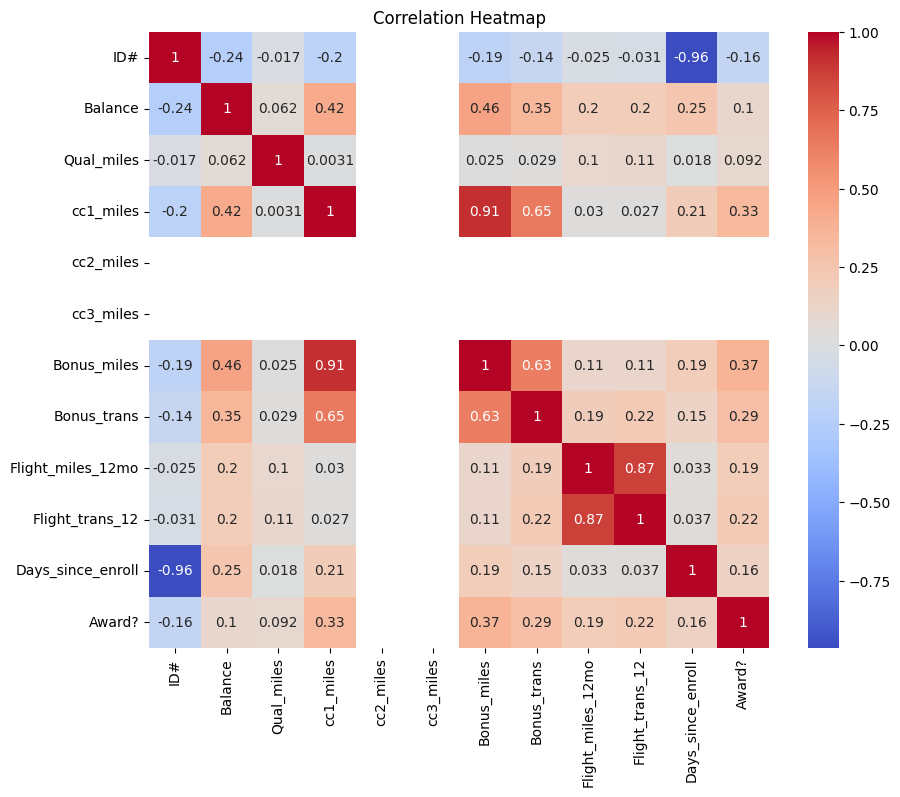

In [16]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df_scaled.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

#  Implementing Clustering Algorithms
K-Means Clustering

In [18]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Determine the optimal number of clusters using the Elbow method
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    sse.append(kmeans.inertia_)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

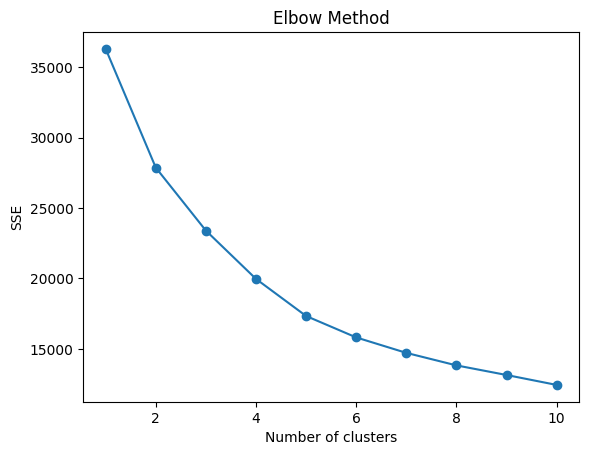

In [19]:
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.title('Elbow Method')
plt.show()

In [54]:
# Assuming the optimal number of clusters from the Elbow method is 3
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans_labels = kmeans.fit_predict(df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [56]:
# Evaluate the clustering performance
kmeans_silhouette = silhouette_score(df, kmeans_labels)
print(f'K-Means Silhouette Score: {kmeans_silhouette}')

K-Means Silhouette Score: 0.6493060301677293


Hierarchical Clustering

In [63]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# Perform hierarchical clustering
linked = linkage(df, method='ward')


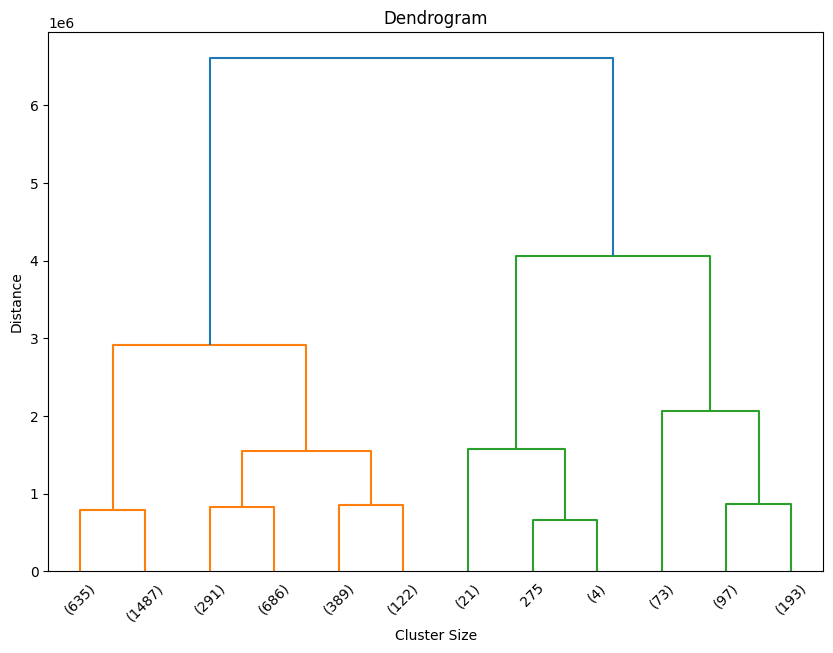

In [64]:
plt.figure(figsize=(10, 7))
dendrogram(linked, truncate_mode='lastp', p=12, show_leaf_counts=True, leaf_rotation=45, leaf_font_size=10)
plt.title('Dendrogram')
plt.xlabel('Cluster Size')
plt.ylabel('Distance')
plt.show()


In [65]:
# Cut the dendrogram to form flat clusters
hierarchical_labels = fcluster(linked, t=3, criterion='maxclust')

# Evaluate the clustering performance
hierarchical_silhouette = silhouette_score(df, hierarchical_labels)
print(f'Hierarchical Clustering Silhouette Score: {hierarchical_silhouette}')

Hierarchical Clustering Silhouette Score: 0.6988370659975399


DBSCAN Clustering

In [66]:
from sklearn.cluster import DBSCAN

# Perform DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(df)



Cluster Analysis and Interpretation

In [70]:
# K-Means clusters
df['KMeans_Cluster'] = kmeans_labels
print(df.groupby('KMeans_Cluster').mean())

# Hierarchical clusters
df['Hierarchical_Cluster'] = hierarchical_labels
print(df.groupby('Hierarchical_Cluster').mean())


                        ID#        Balance  Qual_miles  cc1_miles  cc2_miles  \
KMeans_Cluster                                                                 
0               1519.353607  188000.250354  285.322489   3.055163   1.009901   
1               2139.382480   39462.146823  106.846700   1.825416   1.015423   
2                944.040000  669585.040000  563.880000   3.160000   1.020000   

                cc3_miles   Bonus_miles  Bonus_trans  Flight_miles_12mo  \
KMeans_Cluster                                                            
0                1.029703  36035.135785    17.650636         997.294201   
1                1.007711  12512.203578    10.148365         324.614744   
2                1.060000  50416.700000    20.320000        1645.500000   

                Flight_trans_12  Days_since_enroll    Award?  
KMeans_Cluster                                                
0                      2.878359        5032.983027  0.504950  
1                      0.979642   

In [73]:
# DBSCAN clusters
df['DBSCAN_Cluster'] = dbscan_labels
print(df.groupby('DBSCAN_Cluster').mean())

                        ID#       Balance  Qual_miles  cc1_miles  cc2_miles  \
DBSCAN_Cluster                                                                
-1              2014.819455  73601.327582  144.114529   2.059515   1.014504   

                cc3_miles   Bonus_miles  Bonus_trans  Flight_miles_12mo  \
DBSCAN_Cluster                                                            
-1               1.012253  17144.846212      11.6019         460.055764   

                Flight_trans_12  Days_since_enroll    Award?  KMeans_Cluster  \
DBSCAN_Cluster                                                                 
-1                     1.373593         4118.55939  0.370343        0.835709   

                Hierarchical_Cluster  
DBSCAN_Cluster                        
-1                          1.188047  


 Visualization

In [77]:
print(f'K-Means Silhouette Score: {kmeans_silhouette}')
print(f'Hierarchical Clustering Silhouette Score: {hierarchical_silhouette}')
print(f'DBSCAN Silhouette Score: {dbscan_silhouette}')

K-Means Silhouette Score: 0.6493060301677293
Hierarchical Clustering Silhouette Score: 0.6988370659975399
DBSCAN Silhouette Score: -0.3994552312980999
